<a href="https://colab.research.google.com/github/jungcloud/first-try/blob/main/2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 인공지능이란?

## 1-1. 인공지능의 말 뜻

인공지능은 말 그대로 인간이 '인공적으로' 만들어낸 '지능'이다. 즉, 컴퓨터로 뭐가의 논리 판단을 알아서 하도록 만든 것을 말하며, 인공지능의 분류에는 아래 그림처럼 다양하게 있으며, 최근 인터넷 매체 등을 통해서 소개되는 대부분의 인공지능은 딥러닝을 의미한다.

<img src='https://img.hankyung.com/photo/202009/AD.23737380.1.jpg'>

## 1-2. 신경망이란?

생명과학 시간에 배운 뉴런을 생각해보자. 수상돌기(가지돌기)에서 이전 뉴런에서 분비한 신경전달 물질을 감지하고 일정량 이상의 신호가 왔다고 판단하면 축삭돌기를 통해 다음 뉴런에 신호를 전달한다. 이 개념을 그대로 컴퓨터로 구현한 것이 **인공 신경**이다.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQmfJu7sdIT8Y1NLmKBPU4MHJ9iHNGQ57OAA&usqp=CAU' width=500>

근데 우리의 뇌는 단세포가 아니기 때문에 굉장히 많은 뉴런들이 복잡하게 얽힌 구조를 띄고 있다. 이처럼 인공 신경을 여러겹 그리고 여러층 쌓아서 깊고 매우 복잡한 구조를 만든 것을 **인공 신경망**이라고 하며, 이를 영어로 **딥 뉴럴 네트워크**라고 한다. 딥 뉴럴 네트워크를 학습하는 과정을 딥러닝이라고 한다.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3a/b8/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork.component.simple-narrative-xl.ts=1694627445038.png/content/adobe-cms/kr/ko/topics/neural-networks/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative/image">



다음 영상을 통해서 딥 뉴럴 네트워크가 어떻게 동작하는지 시각적으로 알 수 있다.

https://youtu.be/aircAruvnKk?si=cDXwAX8oEFQeOCJD

# 2. 간단한 모델 만들어보기


### 우리가 쓸 데이터셋 알아보기

사람이 숫자를 직접 쓴 숫자 필기체 데이터들을 모은 것으로 MNIST라는 이름으로 불린다. 수학을 배울때 더하기를 먼저 배우듯 인공지능을 할 때 가장 먼저 다뤄보는 데이터셋이다.

<img src="https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/7E8/image/-PFjiPPm58mQqyVuadI6vWPXvCg.png">

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential

### 행렬의 곱

<img src="https://www.mathsisfun.com/algebra/images/matrix-multiply-ex1b.svg">
<img src="https://i.pinimg.com/736x/0e/bc/0d/0ebc0d88dd2151f0e9b07e5e1001e4c0.jpg">


### flatten이란?

뉴런에 이미지를 입력하기 위해서는 아래와 같이 이미지를 평평하게 펴줄 필요가 있다. 선형 대수에서의 행렬의 곱연산을 생각하면 편하다.

<img src="https://i.stack.imgur.com/rx3X4.png" width=500>

### softmax란?

인공지능이 만들어낸 출력값들을 확률값으로 만들어주는 기능을 한다. 우리는 인공지능이 데이터를 보고 0인지 6인지에 대한 확률이 필요하기 때문이다. 왜 확률이 필요한지는 조금 이따가 설명하겠다.

<img src="https://www.oreilly.com/api/v2/epubs/9781788392303/files/assets/53e7b660-22b9-4eec-b435-623d7458a621.png">

### accuracy (정확도)

정확도는 말그대로 얼마나 정확한지를 말한다. 정확도 측정 방법은 아래와 같다.

$정확도 = \frac{맞춘 \ 개수}{전체 \ 맞춰야하는 \ 개수}$

In [1]:
# 단층 Linear 모델
def build_single_layer_model():
  model = Sequential([
    Flatten(input_shape=(28, 28)),  # MNIST 이미지 플래튼
    Dense(10, activation='softmax') # 10개 클래스에 대한 출력
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

### 이미지 정규화

이미지는 [0, 255] 사이의 값으로 표현된다. 최소값인 0과 최대값인 255의 범위가 매우 크기 때문에 딥러닝을 할 때 학습에 불안정성이 생길 수 있다. 따라서 이미지의 범위를 [0, 1]사이의 실수로 만들기 위해 255로 나눠준다.

### 원핫 인코딩(one-hot encoding)

정답이 0이라면 [1,0,0,0,0,0,0,0,0,0], 정답이 9라면 [0,0,0,0,0,0,0,0,0,1]이 되도록 하는 것. 즉, 정답에 해당하는 인덱스의 확률값이 1이 되도록 하는 것. 이를 통해서 softmax로 나온 확률값과 비교해서 인공지능이 예측한 값과 비교할 수 있도록 한다.

예를 들어 인공지능이 [0.8, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0]이라고 예측하고, 정답이 [1,0,0,0,0,0,0,0,0,0]이라면 두 벡터의 거리 등으로 오차율을 계산해서 인공지능을 역전파를 통해 학습시킨다.

### batch size와 epoch

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTAxMjNfMjU4/MDAxNTQ4MjM1Nzg3NTA2.UtvnGsckZhLHOPPOBWH841IWsZFzNcgwZvYKi2nxImEg.CdtqIxOjWeBo4eNBD2pXu5uwYGa3ZVUr8WZvtldArtYg.PNG.qbxlvnf11/20190123_182720.png?type=w800">

### 역전파

아래의 그림처럼 오차율이 나오면 이 오차가 적어지는 방향으로 인공지능의 가중치들을 조절해나가는 방법.

<img src="https://blog.kakaocdn.net/dn/MkXPU/btrn22tDCYw/GmqV3JztgW377ATDC3e6E0/img.png">


### train, validation, test

수능으로 예를 들자. 우리는 수능을 보기 위해서 모의고사 시험을 보고, 모의고사 시험을 보기 위해서 문제집을 푼다. train은 여기서 문제집을 푸는 것, validation은 모의고사를 보는 것, test는 수능을 보는 것이라고 생각하면 된다. 즉, test 성적이 제일 높게 나오는 것이 좋은데, 우리가 지금까지 학습한 것이 과연 잘하고 있는 것인지를 확인하기 위해 validation을 진행해 이 성능이 잘 나오는지를 보며 test 성적이 좋을지를 예측한다.

In [ ]:
# MNIST 데이터셋 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# 모델 정의 (위에서 정의한 함수 사용)
single_layer_model = build_single_layer_model()

# 학습 매개변수 설정
batch_size = 32
epochs = 5

# 단층 Linear 모델 학습
single_layer_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels))

# 3. 더 복잡한 모델 만들기

### 다층으로 만들기

2에서 만든 모델은 단 1개의 층으로 이루어진 단층 모델이었다. 그럼 층을 더 쌓아서 모델이 더 복잡해진다면 성능이 오르지 않을까? 대답은 비선형 함수(activation function)를 추가해준다면 'yes'이다. 여튼 층을 더 여러개를 둔다면 더 정확도가 높은 모델을 만들 수 있다. 이를 다층 퍼셉트론(multi-layer perceptron)이라고도 부른다.

### 비선형 함수가 필요한 이유

수식으로 설명하겠다.

간단하게 y가 인공지능이 내는 결과라고 하고 2개의 층을 쌓은 모델이라고 하자.

$y=a_{21}z_1+a_{22}z_2$

$z_1=a_{11}x_1+a_{11}x_2$

$z_2=a_{12}x_1+a_{12}x_2$

$y=a_{21}(a_{11}x_1+a_{11}x_2)+a_{22}(a_{12}x_1+a_{12}x_2)=(a_{21}a_{11}+a_{22}a_{12})x_1+(a_{21}a_{11}+a_{22}a_{12})x_2=\alpha_2x_1+\alpha_2x_2$

위처럼 기껏 2개의 층을 쌓았는데 결국 1개의 층이 된 것과 같은 결과가 된다. 이를 막기 위해서 비선형 함수를 사용해야한다.

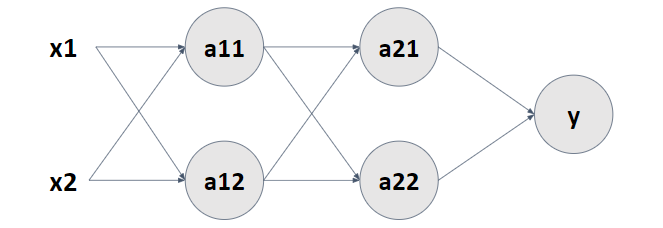

### dropout

드롭아웃(dropout)은 정규화의 효과를 주기 때문에 예전에는 많이 사용했지만, 현재는 대체 가능한 기술이 나와 일부 연구를 제외하고는 사용되지 않는다. 여기서 정규화의 말이 어렵다면 하나의 예시를 들겠다.

만약 하나의 가중치가 결과에 매우 큰 영향을 준다면 이는 절대 좋은 현상이 아니다. 이는 해당 가중치에 과하게 의존적이게 되는 효과가 생겨 다른 가중치의 연산 결과는 무시되는 경향이 생기기 때문이다. 즉, 기껏 열심히 층을 여러개 만들어서 많은 가중치를 사용하도록 했는데 가중치 하나만 사용하는 것과 비슷해지기 때문에 전체적으로 모든 가중치가 비슷한 영향력을 낼 수 있도록 해주는 것이다. 이를 보고 정규화의 효과가 있다라고 한다.


<img src="https://www.oreilly.com/api/v2/epubs/9781788295628/files/assets/d4d20bd7-192c-48e7-9da2-6d3ddc7929e7.png" width=600>

In [ ]:
# 다층 Linear 모델
def build_multi_layer_model_without_activation():
  model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),  # 첫 번째 숨겨진 레이어
    Dropout(0.5),                   # Dropout 추가
    Dense(64),   # 두 번째 숨겨진 레이어
    Dropout(0.5),                   # Dropout 추가
    Dense(10, activation='softmax') # 출력 레이어
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# 다층 Linear 모델
def build_multi_layer_model():
  model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),  # 첫 번째 숨겨진 레이어
    Dropout(0.5),                   # Dropout 추가
    Dense(64, activation='relu'),   # 두 번째 숨겨진 레이어
    Dropout(0.5),                   # Dropout 추가
    Dense(10, activation='softmax') # 출력 레이어
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# MNIST 데이터셋 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# 모델 정의 (위에서 정의한 함수 사용)
multi_layer_model = build_multi_layer_model()
# multi_layer_model = build_multi_layer_model_without_activation()

# 학습 매개변수 설정
batch_size = 32
epochs = 5

# 다층 Linear 모델 학습
multi_layer_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels))

# 4. 다른 방식으로 모델 만들기

### 컨볼루션(convolution)

기존의 방법은 이미지 전체를 한번에 보고 예측하도록 했다면, 이번에 할 방법은 이미지의 부분부분을 보도록 하는 방법을 배워보고자 한다. 이는 convolution이라고 하며 결론부터 말하면 성능이 비약적으로 향상될 것이다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAO04Eovo5TQ3pCda4AKNdX_6pEDHBQcs_Qw&usqp=CAU" width=500>

<img src="https://cdn-images-1.medium.com/max/1024/1*3BRLw4lsANPEfGgimG3YVQ.png">

아래의 사진을 예시로 들겠다. 데이터는 실제로 사람이 만들기 때문에 어떤 형태든지 만들어질 수 있다. 아래의 사진처럼 말이다. 아래의 사진은 대부분은 여백으로 쓸모없는 부분이고 사실상 가장자리에 쓸모있는 데이터가 몰려있는 형태이다. convolution은 지역적인 특징을 학습하기 때문에 결과에 실질적인 영향을 미치는 부분이 이미지 내에서 이동되더라도 이를 학습을 잘하기 때문에 일반적으로 성능이 좋아진다.

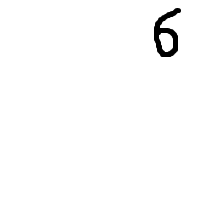

### 최대값 풀링(max pooling)

일정 범위 내에서 가장 높은 값을 선택함으로써, 가장 두드러진 특징을 강조한다. 이는 신경망이 더 중요한 정보에 집중하게 하여, 성능을 향상시키는 데 도움을 준다.

<img src="https://production-media.paperswithcode.com/methods/MaxpoolSample2.png">

### 배치 정규화 (batch normalization)

드롭아웃을 쓰지 않게 된 이유로 배치 정규화를 통해 정규화 효과를 낼 수 있으며 다양한 장점에 의해서 널리 사용된다.

배치 정규화는 층 마다 분포가 심하게 달라지는 현상을 줄여줘 훈련을 안정적이게 해주고 최고 성능에 빠르게 수렴하도록 해준다.

<img src="https://velog.velcdn.com/images/pindum/post/fded9d42-ce26-4984-bc25-b9fd09bcd2ba/image.png">

<img src="https://gaussian37.github.io/assets/img/dl/concept/batchnorm/13.png">

In [ ]:
# CNN 모델
def build_cnn_model():
  model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
    BatchNormalization(),  # 배치 정규화 추가
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3)),
    BatchNormalization(),  # 배치 정규화 추가
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [2]:
# MNIST 데이터셋 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# 모델 정의 (위에서 정의한 함수 사용)
cnn_model = build_cnn_model()

# 학습 매개변수 설정
batch_size = 32
epochs = 5

# CNN 모델 학습
# CNN을 위해 이미지 차원 재조정 (28x28 -> 28x28x1)
train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

cnn_model.fit(train_images_cnn, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images_cnn, test_labels))

NameError: name 'mnist' is not defined

# 5. 성능 더 끌어올리기

### 데이터 증강

기본적으로 데이터는 좋은 퀄리티라면 많으면 많을수록 무조건 좋다. 지금 가진 데이터는 6만장인데 이를 인위적으로 더 늘릴 수 있다. 이미지를 조금 회전을 한다던가 상하좌우 방향 임의로 조금 이동시키는 등을 이용할 수 있다. 이런 것을 보고 데이터 증강(data augmentation)이라고 한다. 하지만 주의해야할 점이 있다. 너무 심한 증강, 예를 들어서 180도 회전이라던지 이미지를 10%정도만 보일 정도로 이동시키는 등의 증강은 너무 원본 데이터의 훼손이 심해 오히려 학습에 악영향이 될 수 있다. (6을 180도 돌리면 9가 되는데 학습시에 누가 봐도 9인 데이터를 6이라고 학습하면 이상한 것처럼)

<img src="https://analyticsindiamag.com/wp-content/uploads/2020/08/UKwFg.jpg">

In [ ]:
# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=10,  # 이미지를 무작위로 회전시킬 각도 범위
    width_shift_range=0.1,  # 수평으로 이동시킬 범위 (전체 너비의 비율)
    height_shift_range=0.1,  # 수직으로 이동시킬 범위 (전체 높이의 비율)
)

# MNIST 데이터셋 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 모델 정의 (위에서 정의한 함수 사용)
cnn_model = build_cnn_model()

# 학습 매개변수 설정
batch_size = 32
epochs = 5

# CNN 모델 학습
# CNN을 위해 이미지 차원 재조정 (28x28 -> 28x28x1)
train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 데이터 증강을 적용하여 학습
cnn_model.fit(datagen.flow(train_images_cnn, train_labels, batch_size=batch_size),
                           epochs=epochs, validation_data=(test_images_cnn, test_labels))

# 6. 직접 해보기

여러분이 직접 학습 코드와 모델을 고쳐서 제가 짠 예시 코드보다 정확도를 더 높여보세요.

In [4]:
def calculate_nucleotide_percentage(dna_sequence):
    """
    DNA 서열에서 각 염기의 비율을 계산합니다.
    """
    total_length = len(dna_sequence)
    percentages = {}

    for nucleotide in 'ACGT':
        count = dna_sequence.count(nucleotide)
        percentages[nucleotide] = (count / total_length) * 100

    return percentages

# 사용자 입력
dna_sequence = input("DNA 서열을 입력하세요: ").upper()

# 염기 비율 계산
percentages = calculate_nucleotide_percentage(dna_sequence)

# 결과 출력
print("각 염기의 비율:")
for nucleotide, percentage in percentages.items():
    print(f"{nucleotide}: {percentage:.2f}%")


DNA 서열을 입력하세요: AAGTTCGCTA
각 염기의 비율:
A: 30.00%
C: 20.00%
G: 20.00%
T: 30.00%
